# SPOTIFY DATA ANALYSIS

![](https://c.tenor.com/iczjaEFdW20AAAAC/spotify-music.gif)

<p>Spotify transformed music listening forever when it launched in Sweden in 2008. Discover, manage and share over 70m tracks for free, or upgrade to Spotify Premium to access exclusive features including offline mode, improved sound quality, and an ad-free music listening experience.

Today, Spotify is the most popular global audio streaming service with 365m users, including 165m subscribers across 178 markets. They are the largest driver of revenue to the music business today.</p>

In [ ]:
# Importing all the Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [ ]:
df=pd.read_csv('/Users/User/Desktop/songs_normalize.csv')


In [ ]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
df.shape

(2000, 18)

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        DATA INFORMATION
    </h3>
    </div>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<div style="color:black;
            display:fill;
            border-radius:1px;
            background-color:lightyellow;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    
* <b>artist</b>: Name of the Artist.<br>
* <b>song</b>:   Name of the Track.<br>
* <b>duration_ms</b>: Duration of the track in milliseconds.<br>
* <b>explicit</b>: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.<br>

* <b>year</b>: Release Year of the track.<br>
* <b>popularity</b>: The higher the value the more popular the song is.<br>
* <b>danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
    
* <b>energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.<br>
* <b>key</b>: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.<br>

* <b>loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br>

* <b>mode</b>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>

* <b>speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>

* <b>acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>

* <b>instrumentalness</b>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>

* <b>liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>

* <b>valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>

* <b>tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>

* <b>genre</b>: Genre of the track.<br>
    
    </div>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EXPLORATORY DATA ANALYSIS
    </h3>
    </div>

In [ ]:
# checking for null values
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [ ]:
#checking for duplicate values
df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [ ]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [ ]:
#shape of the dataset
df.shape

(1941, 18)

In [ ]:
# Description of the Data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [ ]:
#Create Dummies Binary Encoding of Dataset
dummies = pd.get_dummies(df.corr())
dummies

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.119608,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
explicit,0.119608,1.000000,0.077361,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650
year,-0.318835,0.077361,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798
popularity,0.048140,0.047308,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.243799,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.164212,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.001795,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,-0.091265,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,0.050653,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.415445,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192


In [ ]:
#Merge two datasets into one
merged = pd.concat([df,dummies],axis='columns')
merged

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,65.0,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009960,-0.028032,0.040698,0.022501,-0.062374,-0.447056,0.000719,-0.312079,0.009210,0.002926,1.000000,-0.003220,-0.107766,-0.126129,-0.105533
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006409,-0.082605,-0.051490,-0.048104,0.021662,0.040662,-0.004053,-0.103575,-0.036433,-0.062401,-0.003220,1.000000,-0.034818,-0.010660,0.035442
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022549,0.008238,-0.026418,-0.010291,-0.127349,0.153922,-0.040827,0.101972,0.028334,0.056532,-0.107766,-0.034818,1.000000,0.014737,0.027449
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.116423,-0.045397,-0.208410,-0.011012,0.403787,0.331756,0.035441,0.228250,-0.080279,0.069247,-0.126129,-0.010660,0.014737,1.000000,-0.023973


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['energy']])
df[ohe.categories_[0]] = transformed.toarray()
print(df.head())


           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  \
0        0.3000          0.000018    

In [ ]:
#KNN Imputation


from sklearn.impute import KNNImputer
cat_variables = df[['duration_ms','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()


,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656


In [ ]:
df = df.drop(['duration_ms','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)
df.head()


,artist,song,explicit,genre,0.0549,0.0581,0.115,0.203,0.219,0.247,0.249,0.261,0.264,0.265,0.275,0.28,0.284,0.291,0.292,0.296,0.302,0.308,0.31,0.314,0.316,0.317,0.318,0.321,0.322,0.329,0.331,0.339,0.34,0.341,0.346,0.347,0.348,0.356,0.358,0.364,0.365,0.366,0.368,0.372,0.378,0.381,0.382,0.385,0.387,0.389,0.391,0.394,0.396,0.398,0.4,0.403,0.404,0.405,0.406,0.407,0.408,0.41,0.412,0.414,0.416,0.417,0.42,0.422,0.425,0.426,0.427,0.428,0.43,0.431,0.433,0.434,0.435,0.437,0.438,0.439,0.44,0.442,0.443,0.444,0.445,0.448,0.449,0.45,0.451,0.452,0.454,0.458,0.459,0.462,0.463,0.465,0.466,0.467,0.468,0.469,0.47,0.471,0.473,0.475,0.476,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.489,0.491,0.492,0.493,0.496,0.497,0.498,0.5,0.501,0.502,0.504,0.505,0.507,0.508,0.51,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.529,0.53,0.531,0.532,0.533,0.534,0.536,0.537,0.538,0.539,0.54,0.541,0.543,0.544,0.546,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.566,0.567,0.568,0.57,0.571,0.572,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.72,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.75,0.751,0.752,0.753,0.754,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.78,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.82,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.83,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.86,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.87,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.89,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.91,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.92,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.93,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.94,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.95,0.951,0.952,0.953,0.954,0.955,0.956,0.957,0.958,0.959,0.961,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.97,0.972,0.974,0.976,0.977,0.978,0.979,0.981,0.982,0.984,0.985,0.988,0.999,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,False,pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
#our data frame no longer has missing values. They have been imputed as the means of k-Nearest Neighbor values.
df.isna().any()

df.isna().sum()

artist              0
song                0
explicit            0
genre               0
0.0549              0
                   ..
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
Length: 598, dtype: int64

In [ ]:
#Picking out data frames for concatenation and merging
df_1=df.iloc[:3]
df_2=df.iloc[4:10]
df_1.head()


,artist,song,explicit,genre,0.0549,0.0581,0.115,0.203,0.219,0.247,0.249,0.261,0.264,0.265,0.275,0.28,0.284,0.291,0.292,0.296,0.302,0.308,0.31,0.314,0.316,0.317,0.318,0.321,0.322,0.329,0.331,0.339,0.34,0.341,0.346,0.347,0.348,0.356,0.358,0.364,0.365,0.366,0.368,0.372,0.378,0.381,0.382,0.385,0.387,0.389,0.391,0.394,0.396,0.398,0.4,0.403,0.404,0.405,0.406,0.407,0.408,0.41,0.412,0.414,0.416,0.417,0.42,0.422,0.425,0.426,0.427,0.428,0.43,0.431,0.433,0.434,0.435,0.437,0.438,0.439,0.44,0.442,0.443,0.444,0.445,0.448,0.449,0.45,0.451,0.452,0.454,0.458,0.459,0.462,0.463,0.465,0.466,0.467,0.468,0.469,0.47,0.471,0.473,0.475,0.476,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.489,0.491,0.492,0.493,0.496,0.497,0.498,0.5,0.501,0.502,0.504,0.505,0.507,0.508,0.51,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.529,0.53,0.531,0.532,0.533,0.534,0.536,0.537,0.538,0.539,0.54,0.541,0.543,0.544,0.546,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.566,0.567,0.568,0.57,0.571,0.572,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.72,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.75,0.751,0.752,0.753,0.754,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.78,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.82,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.83,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.86,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.87,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.89,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.91,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.92,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.93,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.94,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.95,0.951,0.952,0.953,0.954,0.955,0.956,0.957,0.958,0.959,0.961,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.97,0.972,0.974,0.976,0.977,0.978,0.979,0.981,0.982,0.984,0.985,0.988,0.999,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,False,pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df_2.head()

,artist,song,explicit,genre,0.0549,0.0581,0.115,0.203,0.219,0.247,0.249,0.261,0.264,0.265,0.275,0.28,0.284,0.291,0.292,0.296,0.302,0.308,0.31,0.314,0.316,0.317,0.318,0.321,0.322,0.329,0.331,0.339,0.34,0.341,0.346,0.347,0.348,0.356,0.358,0.364,0.365,0.366,0.368,0.372,0.378,0.381,0.382,0.385,0.387,0.389,0.391,0.394,0.396,0.398,0.4,0.403,0.404,0.405,0.406,0.407,0.408,0.41,0.412,0.414,0.416,0.417,0.42,0.422,0.425,0.426,0.427,0.428,0.43,0.431,0.433,0.434,0.435,0.437,0.438,0.439,0.44,0.442,0.443,0.444,0.445,0.448,0.449,0.45,0.451,0.452,0.454,0.458,0.459,0.462,0.463,0.465,0.466,0.467,0.468,0.469,0.47,0.471,0.473,0.475,0.476,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.489,0.491,0.492,0.493,0.496,0.497,0.498,0.5,0.501,0.502,0.504,0.505,0.507,0.508,0.51,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.529,0.53,0.531,0.532,0.533,0.534,0.536,0.537,0.538,0.539,0.54,0.541,0.543,0.544,0.546,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.566,0.567,0.568,0.57,0.571,0.572,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.72,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.75,0.751,0.752,0.753,0.754,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.78,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.82,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.83,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.86,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.87,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.89,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.91,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.92,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.93,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.94,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.95,0.951,0.952,0.953,0.954,0.955,0.956,0.957,0.958,0.959,0.961,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.97,0.972,0.974,0.976,0.977,0.978,0.979,0.981,0.982,0.984,0.985,0.988,0.999,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
4,*NSYNC,Bye Bye Bye,False,pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
#concatenation
print (pd.concat([df_1,df_2]))

            artist                    song  explicit              genre  \
0   Britney Spears  Oops!...I Did It Again     False                pop   
1        blink-182    All The Small Things     False          rock, pop   
2       Faith Hill                 Breathe     False       pop, country   
4           *NSYNC             Bye Bye Bye     False                pop   
5            Sisqo              Thong Song      True  hip hop, pop, R&B   
6           Eminem     The Real Slim Shady      True            hip hop   
7  Robbie Williams                 Rock DJ     False          pop, rock   
8  Destiny's Child             Say My Name     False           pop, R&B   
9            Modjo  Lady - Hear Me Tonight     False   Dance/Electronic   

   0.0549  0.0581  0.115  0.203  0.219  0.247  0.249  0.261  0.264  0.265  \
0     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     0.0     0.0 

In [ ]:
#merging
df_merged = df_1.merge(df_2)
print('Result Default Merge:\n', df_merged)

df_merged = df_1.merge(df_2, left_index=True, right_index=True)
print('\nResult Index Merge:\n', df_merged)

Result Default Merge:
 Empty DataFrame
Columns: [artist, song, explicit, genre, 0.0549, 0.0581, 0.115, 0.203, 0.219, 0.247, 0.249, 0.261, 0.264, 0.265, 0.275, 0.28, 0.284, 0.291, 0.292, 0.296, 0.302, 0.308, 0.31, 0.314, 0.316, 0.317, 0.318, 0.321, 0.322, 0.329, 0.331, 0.339, 0.34, 0.341, 0.346, 0.347, 0.348, 0.356, 0.358, 0.364, 0.365, 0.366, 0.368, 0.372, 0.378, 0.381, 0.382, 0.385, 0.387, 0.389, 0.391, 0.394, 0.396, 0.398, 0.4, 0.403, 0.404, 0.405, 0.406, 0.407, 0.408, 0.41, 0.412, 0.414, 0.416, 0.417, 0.42, 0.422, 0.425, 0.426, 0.427, 0.428, 0.43, 0.431, 0.433, 0.434, 0.435, 0.437, 0.438, 0.439, 0.44, 0.442, 0.443, 0.444, 0.445, 0.448, 0.449, 0.45, 0.451, 0.452, 0.454, 0.458, 0.459, 0.462, 0.463, 0.465, 0.466, 0.467, 0.468, 0.469, ...]
Index: []

Result Index Merge:
 Empty DataFrame
Columns: [artist_x, song_x, explicit_x, genre_x, 0.0549_x, 0.0581_x, 0.115_x, 0.203_x, 0.219_x, 0.247_x, 0.249_x, 0.261_x, 0.264_x, 0.265_x, 0.275_x, 0.28_x, 0.284_x, 0.291_x, 0.292_x, 0.296_x, 0.302_x, 

In [ ]:
#sorting dataset
df.sort_index(ascending=True)

,artist,song,explicit,genre,0.0549,0.0581,0.115,0.203,0.219,0.247,0.249,0.261,0.264,0.265,0.275,0.28,0.284,0.291,0.292,0.296,0.302,0.308,0.31,0.314,0.316,0.317,0.318,0.321,0.322,0.329,0.331,0.339,0.34,0.341,0.346,0.347,0.348,0.356,0.358,0.364,0.365,0.366,0.368,0.372,0.378,0.381,0.382,0.385,0.387,0.389,0.391,0.394,0.396,0.398,0.4,0.403,0.404,0.405,0.406,0.407,0.408,0.41,0.412,0.414,0.416,0.417,0.42,0.422,0.425,0.426,0.427,0.428,0.43,0.431,0.433,0.434,0.435,0.437,0.438,0.439,0.44,0.442,0.443,0.444,0.445,0.448,0.449,0.45,0.451,0.452,0.454,0.458,0.459,0.462,0.463,0.465,0.466,0.467,0.468,0.469,0.47,0.471,0.473,0.475,0.476,0.479,0.48,0.481,0.482,0.484,0.485,0.486,0.487,0.488,0.489,0.491,0.492,0.493,0.496,0.497,0.498,0.5,0.501,0.502,0.504,0.505,0.507,0.508,0.51,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.52,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.529,0.53,0.531,0.532,0.533,0.534,0.536,0.537,0.538,0.539,0.54,0.541,0.543,0.544,0.546,0.548,0.549,0.55,0.551,0.552,0.553,0.554,0.557,0.558,0.559,0.56,0.561,0.562,0.563,0.564,0.566,0.567,0.568,0.57,0.571,0.572,0.574,0.575,0.576,0.577,0.578,0.579,0.58,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.59,0.591,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.6,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.617,0.618,0.619,0.62,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.63,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.65,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.66,0.661,0.662,0.663,0.664,0.665,0.666,0.667,0.668,0.669,0.67,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,0.679,0.68,0.681,0.682,0.683,0.684,0.685,0.686,0.687,0.688,0.689,0.69,0.691,0.692,0.693,0.694,0.695,0.696,0.697,0.698,0.699,0.7,0.701,0.702,0.703,0.704,0.705,0.706,0.707,0.708,0.709,0.71,0.711,0.712,0.713,0.714,0.715,0.716,0.717,0.718,0.719,0.72,0.721,0.722,0.723,0.724,0.725,0.726,0.727,0.728,0.729,0.73,0.731,0.732,0.733,0.734,0.735,0.736,0.737,0.738,0.739,0.74,0.741,0.742,0.743,0.744,0.745,0.746,0.747,0.748,0.749,0.75,0.751,0.752,0.753,0.754,0.756,0.757,0.758,0.759,0.76,0.761,0.762,0.763,0.764,0.765,0.766,0.767,0.768,0.769,0.77,0.771,0.772,0.773,0.774,0.775,0.776,0.777,0.778,0.779,0.78,0.781,0.782,0.783,0.784,0.785,0.786,0.787,0.788,0.789,0.79,0.791,0.792,0.793,0.794,0.795,0.796,0.797,0.798,0.799,0.8,0.801,0.802,0.803,0.804,0.805,0.806,0.807,0.808,0.809,0.81,0.811,0.812,0.813,0.814,0.815,0.816,0.817,0.818,0.819,0.82,0.821,0.822,0.823,0.824,0.825,0.826,0.827,0.828,0.829,0.83,0.831,0.832,0.833,0.834,0.835,0.836,0.837,0.838,0.839,0.84,0.841,0.842,0.843,0.844,0.845,0.846,0.847,0.848,0.849,0.85,0.851,0.852,0.853,0.854,0.855,0.856,0.857,0.858,0.859,0.86,0.861,0.862,0.863,0.864,0.865,0.866,0.867,0.868,0.869,0.87,0.871,0.872,0.873,0.874,0.875,0.876,0.877,0.878,0.879,0.88,0.881,0.882,0.883,0.884,0.885,0.886,0.887,0.888,0.889,0.89,0.891,0.892,0.893,0.894,0.895,0.896,0.897,0.898,0.899,0.9,0.901,0.902,0.903,0.904,0.905,0.906,0.907,0.908,0.909,0.91,0.911,0.912,0.913,0.914,0.915,0.916,0.917,0.918,0.919,0.92,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928,0.929,0.93,0.931,0.932,0.933,0.934,0.935,0.936,0.937,0.938,0.939,0.94,0.941,0.942,0.943,0.944,0.945,0.946,0.947,0.948,0.95,0.951,0.952,0.953,0.954,0.955,0.956,0.957,0.958,0.959,0.961,0.963,0.964,0.965,0.966,0.967,0.968,0.969,0.97,0.972,0.974,0.976,0.977,0.978,0.979,0.981,0.982,0.984,0.985,0.988,0.999,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Britney Spears,Oops!...I Did It Again,False,pop,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
df.info

<bound method DataFrame.info of               artist                                    song  explicit  \
0     Britney Spears                  Oops!...I Did It Again     False   
1          blink-182                    All The Small Things     False   
2         Faith Hill                                 Breathe     False   
3           Bon Jovi                            It's My Life     False   
4             *NSYNC                             Bye Bye Bye     False   
...              ...                                     ...       ...   
1995  Jonas Brothers                                  Sucker     False   
1996    Taylor Swift                            Cruel Summer     False   
1997    Blanco Brown                              The Git Up     False   
1998       Sam Smith  Dancing With A Stranger (with Normani)     False   
1999     Post Malone                                 Circles     False   

                 genre  0.0549  0.0581  0.115  0.203  0.219  0.247  0.249  \
0 

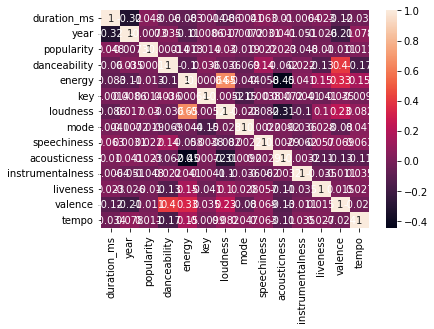

In [ ]:
#corelation heat map
viz=sns.heatmap(df[['duration_ms','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].corr(),annot=True)

In [ ]:
X = df[['duration_ms', 'year',
           'energy',]]

X

,duration_ms,year,energy
0,211160,2000,0.834
1,167066,1999,0.897
2,250546,1999,0.496
3,224493,2000,0.913
4,200560,2000,0.928
...,...,...,...
1995,181026,2019,0.734
1996,178426,2019,0.702
1997,200593,2019,0.678
1998,171029,2019,0.520


In [ ]:
# Linear regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = df[['duration_ms', 'year',
           'energy',]]

le = preprocessing.LabelEncoder()
le.fit(df[['mode']])
# list(le.classes_)
Y=le.transform(df[['mode']])

#Using Train-Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train )
print(lm.score(X_test, Y_test)*100000)

-83.45641740692412


In [ ]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [ ]:
fig=px.area(df.groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',markers=True,labels={'song':'Total songs'},color_discrete_sequence=['green'],title='<b>Year by Year Songs collection')
fig.update_layout(hovermode='x',title_x=0.5)

In [ ]:
fig=px.histogram(df.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

In [ ]:
fig=px.histogram(df.groupby('genre',as_index=False).sum().sort_values(by='popularity',ascending=False),x='genre',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',marginal='box',title='<b>Popular genres based on pouplarity</b>')
fig.update_layout(title_x=0.5)

In [ ]:
px.bar(df.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False).head(50),x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],text='song',title='<b> List of Songs Recorded by Each Singer')

In [ ]:
px.bar(df.groupby('artist',as_index=False).sum().sort_values(by='popularity',ascending=False).head(30),x='artist',y='popularity',color_discrete_sequence=['lightgreen'],template='plotly_dark',text='popularity',title='<b>Top 30 Popular Singers')

In [ ]:
fig=px.line(df.sort_values(by='popularity',ascending=False).head(25),x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

In [ ]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['green','crimson'],template='plotly_dark',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

In [ ]:
fig=px.area(df[df['explicit']==True].groupby('year',as_index=False).count().sort_values(by='song',ascending=False).sort_values(by='year'),x='year',y='song',labels={'song':'Total songs'},markers=True,color_discrete_sequence=['red'],template='plotly_dark',title='<b>Yearwise explicit content songs')
fig.update_layout(hovermode='x')

In [ ]:
px.box(df,x='explicit',y='popularity',color='explicit',template='plotly_dark',color_discrete_sequence=['cyan','magenta'],title='<b>popularity based on explicit content')

In [ ]:
px.scatter(df,x='tempo',y='popularity',color='tempo',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b>Tempo Versus Popularity')

In [ ]:
px.scatter(df,x='speechiness',y='popularity',color='speechiness',color_continuous_scale=px.colors.sequential.Plasma,template='plotly_dark',title='<b> Speechiness Versus Popularity')

In [ ]:
px.scatter(df,x='energy',y='danceability',color='danceability',color_continuous_scale=px.colors.sequential.Plotly3,template='plotly_dark',title='<b>Energy Versus Danceability')

In [ ]:
px.scatter(df,x='energy',y='loudness',color_discrete_sequence=['lightgreen'],template='plotly_dark',title='<b>Energy versus Loudness correlation')

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        CONCLUSION
    </h3>
    </div><br><br>
<h7>From the Analysis, we can conclude that the most popular genre in the music market is pop.
According to the musicians, pop music is inherently popular because it creates a sense of familiarity for listeners. Therefore, when they hear the same 'woop' throughout the genre, they're more inclined to ease into a piece of music they've never heard because it sounds familiar.

Almost 28% of Songs contains Explicit Content and on coming to popularity, explicit content songs Has high median popularity.
    
The top 3 singers who recorded maximum songs in their album are Rihanna, Drake and Eminem. Top 3 popular Singers in Spotify are<br><a href='https://open.spotify.com/artist/5pKCCKE2ajJHZ9KAiaK11H?autoplay=true' style='text-decoration:none'>Rihanna   </a>,<a href='https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR?autoplay=true' style='text-decoration:none'> Eminem</a> and <a href='https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4?autoplay=true' style='text-decoration:none'>Drake </a>.

Top 3 popular songs to check out are <br><br><a href='https://open.spotify.com/track/5FiHhop5lURiKgpFRHU3QC?autoplay=true' style='text-decoration:none'>1. Sweather Weather</a> by The Neighbourhood<br> <a href='https://open.spotify.com/track/3B8AjxvLomrKgKwWMCNn31?autoplay=true' style='text-decoration:none'>2. Another Love</a> by Tom Odell<br><a href='https://open.spotify.com/track/7lQ8MOhq6IN2w8EYcFNSUk?autoplay=true' style='text-decoration:none'>3. Without Me</a> by Eminem.
</h7>

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        END
    </h3>
    </div>